In [4]:
#project2 start
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# 打开 CSV 文件
data = []
with open('dft_rawcount_region_id_3.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)  # 读取表头
    for row in reader:
        data.append(row)  # 每一行数据作为列表添加到数据集中

print("Header:", header)  # 打印表头
print("Data:", data[:5])  # 打印前 5 行数据


Header: ['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour', 'region_id', 'region_name', 'local_authority_id', 'local_authority_name', 'road_name', 'road_type', 'start_junction_road_name', 'end_junction_road_name', 'easting', 'northing', 'latitude', 'longitude', 'link_length_km', 'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles']
Data: [['62', 'E', '2021', '2021-09-15', '7', '3', 'Scotland', '4', 'North Lanarkshire', 'M80', 'Major', 'A73', 'A73', '274293', '674066', '55.94314500', '-4.01429220', '0.60', '0.37', '0', '1', '1741', '1', '707', '63', '24', '16', '6', '9', '170', '288', '2738'], ['62', 'E', '2021', '2021-09-15', '8', '3', 'Scotland', '4', 'North Lanarkshire', 'M80', 'Major', 'A73', 'A73', '274293', '674066

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vehicle_proportion_heatmap(data, group_by='road_name', title='Heatmap of Vehicle Type Proportions by Road Type'):
    """
    根据车辆比例绘制热力图。
    
    参数：
        data (pd.DataFrame): 包含交通数据的 DataFrame。
        group_by (str): 按此列进行分组，默认是 'road_name'。
        title (str): 图表标题，默认是 'Heatmap of Vehicle Type Proportions by Road Type'。
    """
    # 确保涉及的列名存在于 DataFrame 中
    numeric_columns = [
        'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
        'buses_and_coaches', 'lgvs', 'all_hgvs', 'all_motor_vehicles'
    ]
    
    # 检查所需列是否存在
    missing_columns = [col for col in numeric_columns if col not in data.columns]
    if missing_columns:
        raise ValueError(f"Data is missing required columns: {missing_columns}")
    
    # 确保 'road_name' 的首字母是道路类型
    data['road_name'] = data['road_name'].str[0]
    
    # 计算每个数据点的总车辆数
    data['total_vehicles'] = data["pedal_cycles"] + data["all_motor_vehicles"]
    
    # 按指定分组列加总各个车辆类型的数量
    aggregated_data = data.groupby(group_by)[numeric_columns + ['total_vehicles']].sum().reset_index()
    
    # 计算每种车辆类型在每个道路类型中的比例
    for col in numeric_columns:
        aggregated_data[f'{col}_ratio'] = aggregated_data[col] / aggregated_data['total_vehicles']
    
    # 准备数据：仅选择比例列
    proportions_data = aggregated_data.set_index(group_by)[[
        'pedal_cycles_ratio', 'two_wheeled_motor_vehicles_ratio',
        'cars_and_taxis_ratio', 'buses_and_coaches_ratio', 'lgvs_ratio',
        'all_hgvs_ratio'
    ]]
    
    # 转换为百分比
    proportions_data = proportions_data * 100
    
    # 绘制热力图
    plt.figure(figsize=(10, 6))
    sns.heatmap(proportions_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
    
    plt.title(title)
    plt.xlabel('Vehicle Types')
    plt.ylabel('Road Types')
    plt.xticks(ticks=range(len(proportions_data.columns)), labels=[
        'Pedal Cycles', 'Two-Wheeled Motor Vehicles', 'Cars and Taxis',
        'Buses and Coaches', 'LGVs', 'All HGVs'], rotation=30)
    
    plt.tight_layout()
    plt.show()



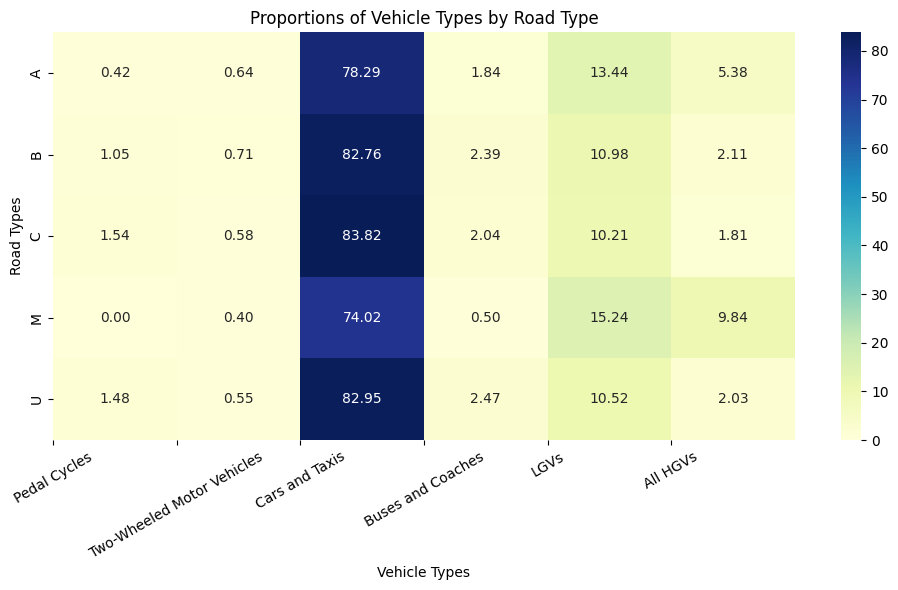

In [97]:


df = pd.DataFrame(data, columns=header)

# 过滤出 'local_authority_name' 为 'City of Edinburgh' 的数据
edf = df[df['local_authority_name'] == 'City of Edinburgh'].copy()


numeric_columns = [
    'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
    'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
    'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
    'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
    'all_motor_vehicles'
]

# 转换为数值类型，无法转换的值设置为 NaN
edf[numeric_columns] = edf[numeric_columns].apply(pd.to_numeric, errors='coerce')


# 假设你的数据存储在名为 `edf` 的 DataFrame 中
plot_vehicle_proportion_heatmap(
    data=edf,
    group_by='road_name',
    title='Proportions of Vehicle Types by Road Type'
)


In [74]:
import pandas as pd
# 将数据加载到 DataFrame

df = pd.DataFrame(data, columns=header)

# 过滤出 'local_authority_name' 为 'City of Edinburgh' 的数据
edf = df[df['local_authority_name'] == 'City of Edinburgh'].copy()

numeric_columns = [
    'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
    'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
    'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
    'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
    'all_motor_vehicles'
]

# 转换为数值类型，无法转换的值设置为 NaN
edf[numeric_columns] = edf[numeric_columns].apply(pd.to_numeric, errors='coerce')


# 确保 'road_name' 的首字母是道路类型
edf.loc[:, 'road_name'] = edf['road_name'].str[0]


# 计算每个数据点的总车辆数
edf['total_vehicles'] = edf["pedal_cycles"] + edf["all_motor_vehicles"]

# 定义所有涉及车辆的列
vehicle_columns = [
    'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
    'buses_and_coaches', 'lgvs', 'all_hgvs', 'total_vehicles']

# 先按道路类型加总各个车辆类型的数量
aggregated_data = edf.groupby('road_name')[vehicle_columns].sum().reset_index()

# 计算每种车辆类型在每个道路类型中的比例
for type in vehicle_columns:
    aggregated_data[f'{type}_ratio'] = aggregated_data[type] / aggregated_data['total_vehicles']


# 打印加总后的结果
print(aggregated_data)



  road_name  pedal_cycles  two_wheeled_motor_vehicles  cars_and_taxis  \
0         A         32660                       49354         6040643   
1         B          5239                        3548          413687   
2         C         11006                        4168          599953   
3         M             0                        3839          713707   
4         U         16064                        5969          900552   

   buses_and_coaches     lgvs  all_hgvs  total_vehicles  pedal_cycles_ratio  \
0             141616  1036830    414764         7715867            0.004233   
1              11952    54895     10537          499858            0.010481   
2              14621    73065     12951          715764            0.015377   
3               4830   146915     94922          964213            0.000000   
4              26787   114235     21994         1085601            0.014797   

   two_wheeled_motor_vehicles_ratio  cars_and_taxis_ratio  \
0                        

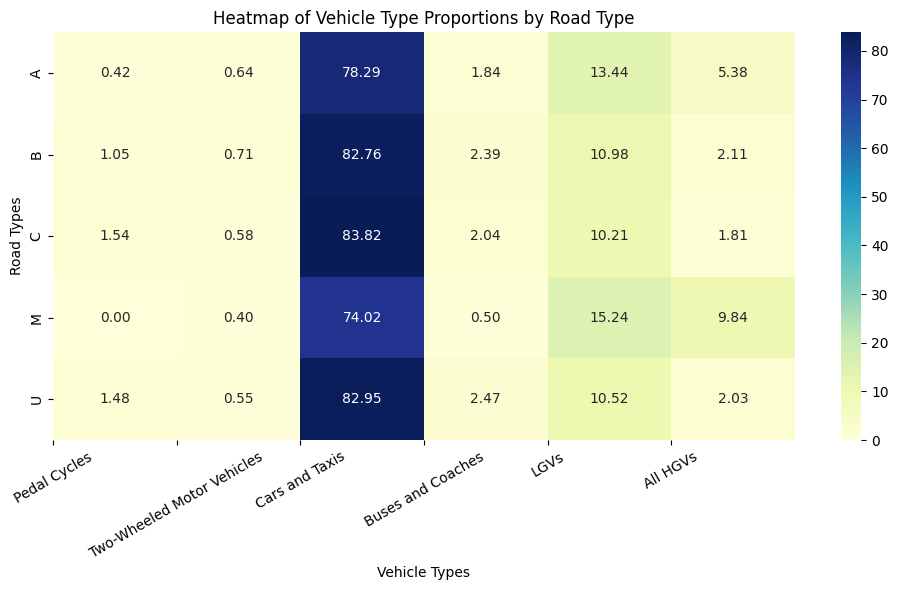

In [80]:
# 准备数据：仅选择比例列
proportions_data = aggregated_data.set_index('road_name')[[
    'pedal_cycles_ratio', 'two_wheeled_motor_vehicles_ratio',
    'cars_and_taxis_ratio', 'buses_and_coaches_ratio', 'lgvs_ratio',
    'all_hgvs_ratio'
]]

# 转换为百分比
proportions_data = proportions_data * 100

plt.figure(figsize=(10, 6))
sns.heatmap(proportions_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)

plt.title('Heatmap of Vehicle Type Proportions by Road Type')
plt.xlabel('Vehicle Types',)
plt.ylabel('Road Types')
plt.xticks(ticks=range(len(proportions_data.columns)), labels=[
    'Pedal Cycles', 'Two-Wheeled Motor Vehicles', 'Cars and Taxis',
    'Buses and Coaches', 'LGVs', 'All HGVs'], rotation=30)

plt.tight_layout()
plt.show()


    road_name  year  pedal_cycles  total_vehicles  pedal_cycles_ratio
0           A  2000        1543.0        359814.0            0.004288
1           A  2001         887.0        264184.0            0.003358
2           A  2002        1947.0        352006.0            0.005531
3           A  2003        1571.0        317560.0            0.004947
4           A  2004        1350.0        352987.0            0.003825
..        ...   ...           ...             ...                 ...
115         U  2019        1045.0         60717.0            0.017211
116         U  2020         493.0          2430.0            0.032302
117         U  2021         234.0          3970.0            0.047394
118         U  2022         260.0          4161.0            0.062485
119         U  2023         285.0          4288.0            0.066465

[120 rows x 5 columns]


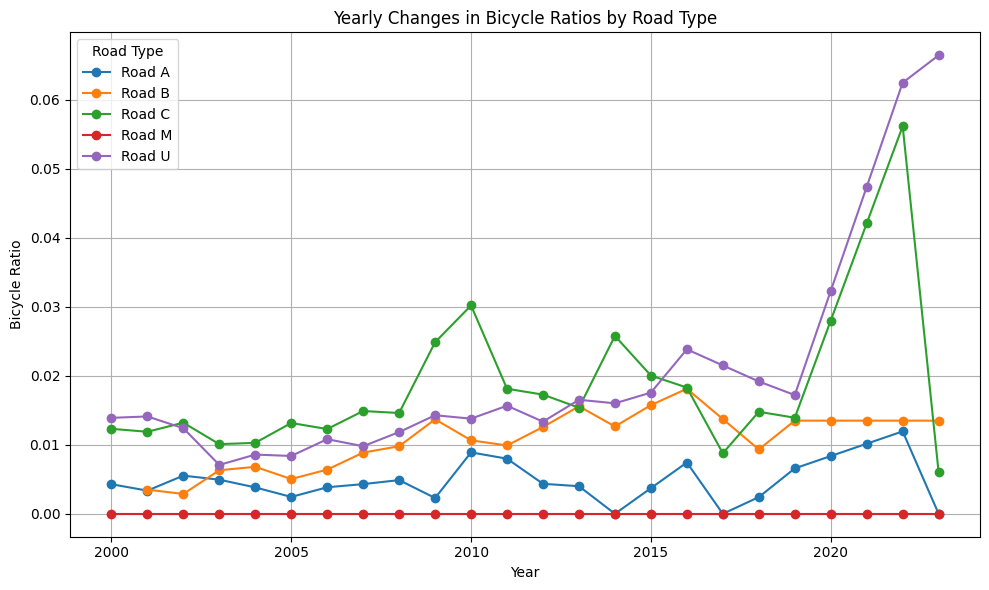

In [89]:

# 按道路类型和年份分组，计算全年自行车数量及总车辆数量
yearly_totals = edf.groupby(['road_name', 'year']).agg({
    'pedal_cycles': 'sum',
    'total_vehicles': 'sum'
}).reset_index()

# 计算新的自行车比例
yearly_totals['pedal_cycles_ratio'] = (
    yearly_totals['pedal_cycles'] / yearly_totals['total_vehicles']
)

# 创建所有道路类型和年份的完整组合
all_years = range(2000, 2024)  # 假设数据年份范围
road_types = yearly_totals['road_name'].unique()
complete_index = pd.MultiIndex.from_product(
    [road_types, all_years], names=['road_name', 'year']
)

# 重新索引数据，确保每个组合都存在
yearly_totals = yearly_totals.set_index(['road_name', 'year']).reindex(complete_index).reset_index()

# 将 2020 和 2021 年的数据设置为空
yearly_totals.loc[yearly_totals['year'].isin([2020, 2021]), 'pedal_cycles_ratio'] = None


# 使用线性插值填充缺失值
yearly_totals['pedal_cycles_ratio'] = yearly_totals.groupby('road_name')['pedal_cycles_ratio'].transform(
    lambda x: x.interpolate(method='linear')
)



# 创建折线图
plt.figure(figsize=(10, 6))

# 遍历每种道路类型，分别绘制其折线
for road_type in yearly_totals['road_name'].unique():
    road_data = yearly_totals[yearly_totals['road_name'] == road_type]
    plt.plot(road_data['year'], road_data['pedal_cycles_ratio'], marker='o', label=f'Road {road_type}')

# 添加图例和标签
plt.title('Yearly Changes in Bicycle Ratios by Road Type')
plt.xlabel('Year')
plt.ylabel('Bicycle Ratio')
plt.legend(title='Road Type')
plt.grid(True)

# 显示图像
plt.tight_layout()
plt.show()

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_vehicle_ratios(data, vehicle_type, start_year=2000, end_year=2023, exclude_years=None):
    """
    绘制按年份分组的指定车辆比例变化折线图。

    Parameters:
        data (pd.DataFrame): 包含车辆数据的 DataFrame。
        vehicle_type (str): 要分析的车辆类型（列名）。
        start_year (int): 分析开始年份。
        end_year (int): 分析结束年份。
        exclude_years (list): 需要排除的年份。
    """
    if exclude_years is None:
        exclude_years = []
    
    # 按道路类型和年份分组，计算车辆数量及总车辆数量
    yearly_totals = data.groupby(['road_name', 'year']).agg({
        vehicle_type: 'sum',
        'total_vehicles': 'sum'
    }).reset_index()
    
   
    # 计算指定车辆的比例
    yearly_totals[f'{vehicle_type}_ratio'] = (
        yearly_totals[vehicle_type] / yearly_totals['total_vehicles']
    )
    
    
    # 创建所有道路类型和年份的完整组合
    all_years = range(start_year, end_year +1)
    road_types = yearly_totals['road_name'].unique()
    complete_index = pd.MultiIndex.from_product(
        [road_types, all_years], names=['road_name', 'year']
    )
    print(complete_index)
    
    print(data['road_name'].unique())
    print(data['year'].unique())

    # 重新索引数据，确保每个组合都存在
    yearly_totals = yearly_totals.set_index(['road_name', 'year']).reindex(complete_index).reset_index()
    print(yearly_totals)
    # 将指定年份的数据设置为空
    yearly_totals.loc[yearly_totals['year'].isin(exclude_years), f'{vehicle_type}_ratio'] = None
    
    # 使用线性插值填充缺失值
    yearly_totals[f'{vehicle_type}_ratio'] = yearly_totals.groupby('road_name')[f'{vehicle_type}_ratio'].transform(
        lambda x: x.interpolate(method='linear')
    )
    
    print(yearly_totals)
    # 创建折线图
    plt.figure(figsize=(10, 6))
    for road_type in yearly_totals['road_name'].unique():
        road_data = yearly_totals[yearly_totals['road_name'] == road_type]
        plt.plot(road_data['year'], road_data[f'{vehicle_type}_ratio'], marker='o', label=f'Road {road_type}')
    
    # 添加图例和标签
    plt.title(f'Yearly Changes in {vehicle_type.capitalize()} Ratios by Road Type')
    plt.xlabel('Year')
    plt.ylabel(f'{vehicle_type.capitalize()} Ratio')
    plt.legend(title='Road Type')
    plt.grid(True)
    
    # 显示图像
    plt.tight_layout()
    plt.show()


MultiIndex([('A', 2000),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003),
            ('A', 2004),
            ('A', 2005),
            ('A', 2006),
            ('A', 2007),
            ('A', 2008),
            ('A', 2009),
            ...
            ('U', 2014),
            ('U', 2015),
            ('U', 2016),
            ('U', 2017),
            ('U', 2018),
            ('U', 2019),
            ('U', 2020),
            ('U', 2021),
            ('U', 2022),
            ('U', 2023)],
           names=['road_name', 'year'], length=120)
['M' 'A' 'B' 'U' 'C']
[2003 2006 2008 2016 2000 2004 2009 2018 2005 2013 2012 2020 2001 2007
 2021 2002 2011 2015 2023 2010 2022 2019 2014 2017]
    road_name  year  pedal_cycles  total_vehicles  pedal_cycles_ratio
0           A  2000        1543.0        359814.0            0.004288
1           A  2001         887.0        264184.0            0.003358
2           A  2002        1947.0        352006.0            0.005531
3     

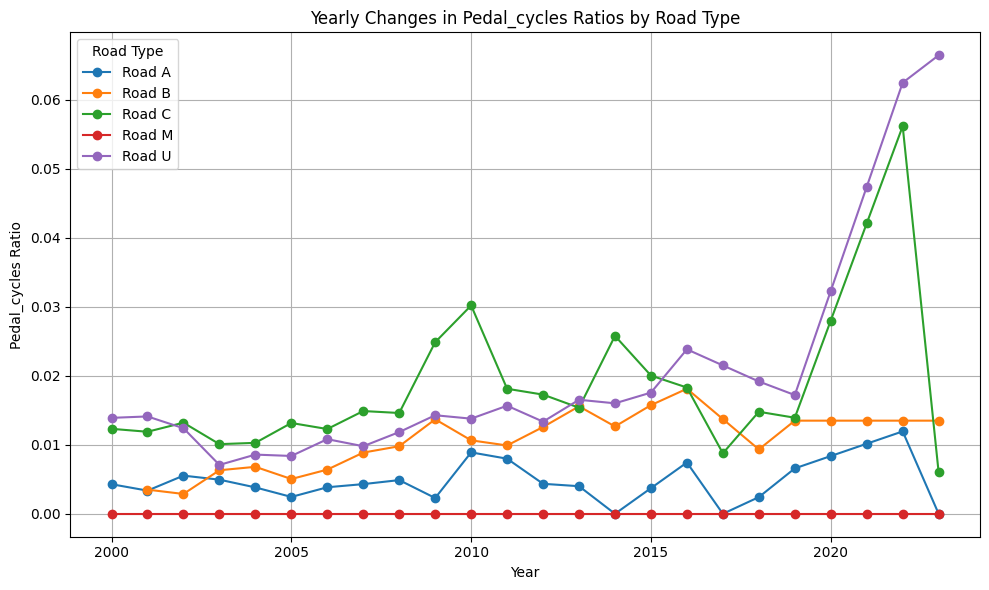

MultiIndex([('A', 2000),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003),
            ('A', 2004),
            ('A', 2005),
            ('A', 2006),
            ('A', 2007),
            ('A', 2008),
            ('A', 2009),
            ...
            ('U', 2014),
            ('U', 2015),
            ('U', 2016),
            ('U', 2017),
            ('U', 2018),
            ('U', 2019),
            ('U', 2020),
            ('U', 2021),
            ('U', 2022),
            ('U', 2023)],
           names=['road_name', 'year'], length=120)
['M' 'A' 'B' 'U' 'C']
[2003 2006 2008 2016 2000 2004 2009 2018 2005 2013 2012 2020 2001 2007
 2021 2002 2011 2015 2023 2010 2022 2019 2014 2017]
    road_name  year  buses_and_coaches  total_vehicles  \
0           A  2000             6371.0        359814.0   
1           A  2001             5519.0        264184.0   
2           A  2002            11898.0        352006.0   
3           A  2003             6836.0        317560.0

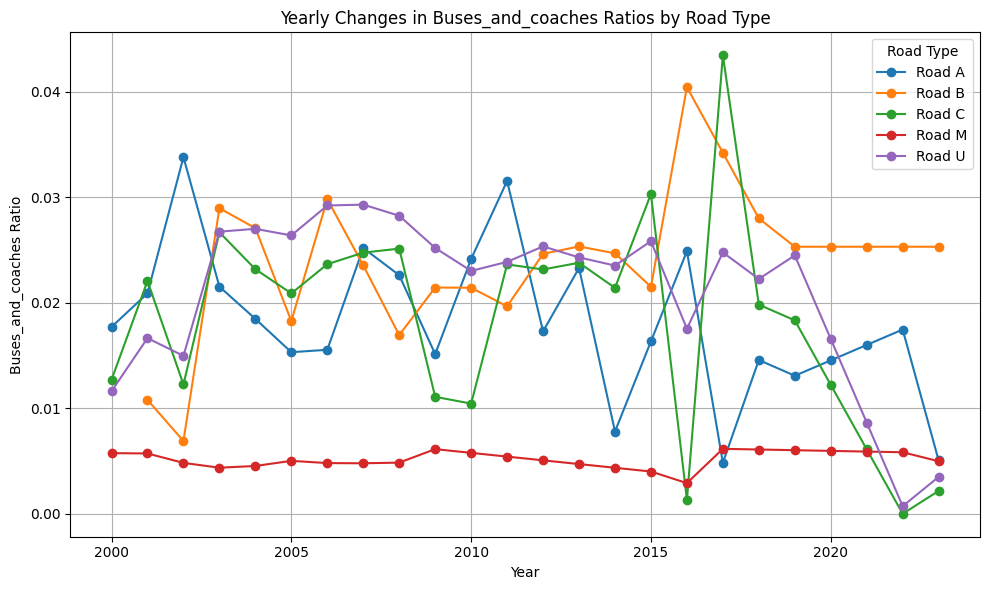

In [129]:
df = pd.DataFrame(data, columns=header)

# 过滤出 'local_authority_name' 为 'City of Edinburgh' 的数据
edf = df[df['local_authority_name'] == 'City of Edinburgh'].copy()
# 将 'year' 列转换为数值类型，无法转换的值设置为 NaN
edf['year'] = pd.to_numeric(edf['year'], errors='coerce')


numeric_columns = [
    'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
    'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
    'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
    'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
    'all_motor_vehicles'
]

# 转换为数值类型，无法转换的值设置为 NaN
edf[numeric_columns] = edf[numeric_columns].apply(pd.to_numeric, errors='coerce')


# 确保 'road_name' 的首字母是道路类型
edf.loc[:, 'road_name'] = edf['road_name'].str[0]


# 计算每个数据点的总车辆数
edf['total_vehicles'] = edf["pedal_cycles"] + edf["all_motor_vehicles"]


plot_vehicle_ratios(edf, 'pedal_cycles', exclude_years=[2020, 2021])
plot_vehicle_ratios(edf, 'buses_and_coaches', exclude_years=[2020, 2021])


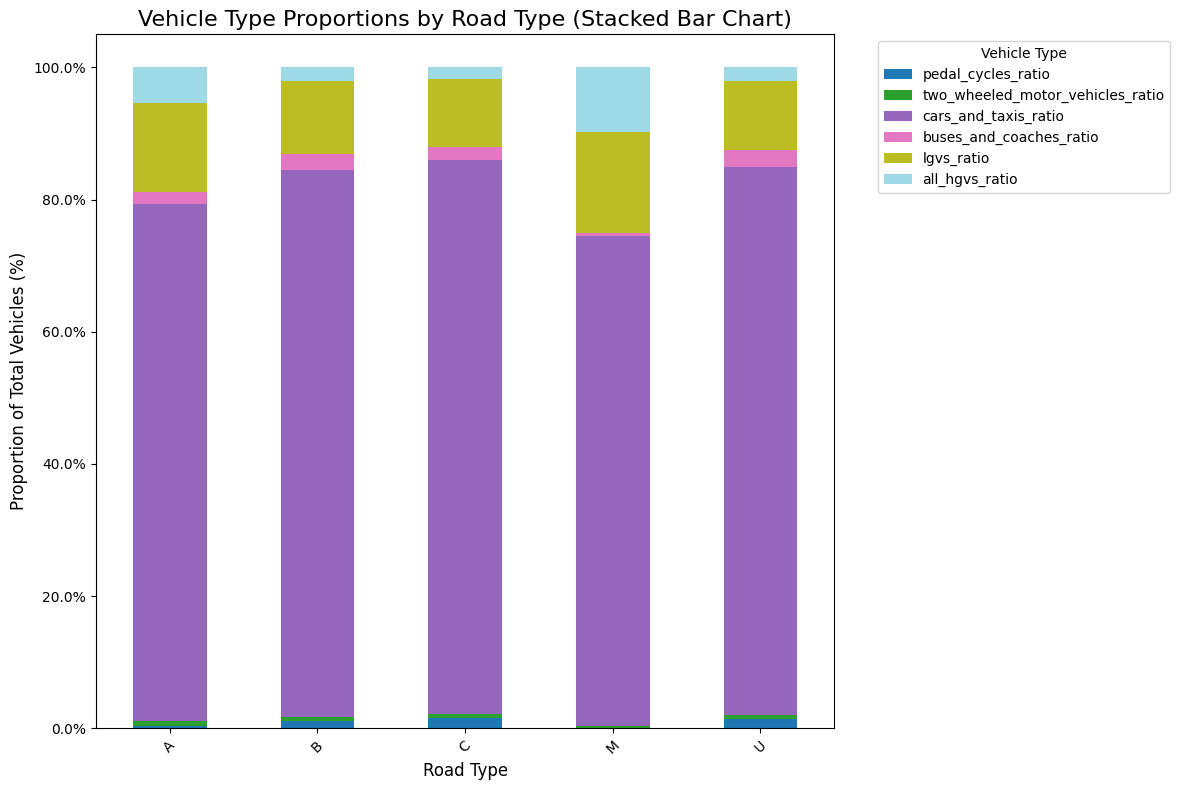

In [92]:

# 选择需要的比例列
vehicle_ratio_columns = [
    'pedal_cycles_ratio', 'two_wheeled_motor_vehicles_ratio', 'cars_and_taxis_ratio',
    'buses_and_coaches_ratio', 'lgvs_ratio', 'all_hgvs_ratio'
]

# 创建长格式数据，方便堆叠
stacked_data = aggregated_data[['road_name'] + vehicle_ratio_columns]

# 将比例列按道路类型堆叠
stacked_data.set_index('road_name', inplace=True)

# 绘制堆叠条形图
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# 设置图表标题和标签
plt.title('Vehicle Type Proportions by Road Type (Stacked Bar Chart)', fontsize=16)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Proportion of Total Vehicles (%)', fontsize=12)

# 设置y轴为百分比格式
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))

# 设置x轴标签旋转角度
plt.xticks(rotation=45)

# 添加图例
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
